In [119]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
import json
import pandas as pd

In [19]:
# load the csv data file
# 10.881, 267, 1
tape = np.loadtxt('Tapes/UoB_Set01_2025-01-02tapes.csv', delimiter=',', dtype=str)
x = tape[:,0].astype(float)
y = tape[:,1].astype(float)
z = tape[:,2].astype(float)
print("shape is {}".format(y.shape))
print("min price is {}".format(np.min(y)))
print("max price is {}".format(np.max(y)))

shape is (23811,)
min price is 243.0
max price is 303.0


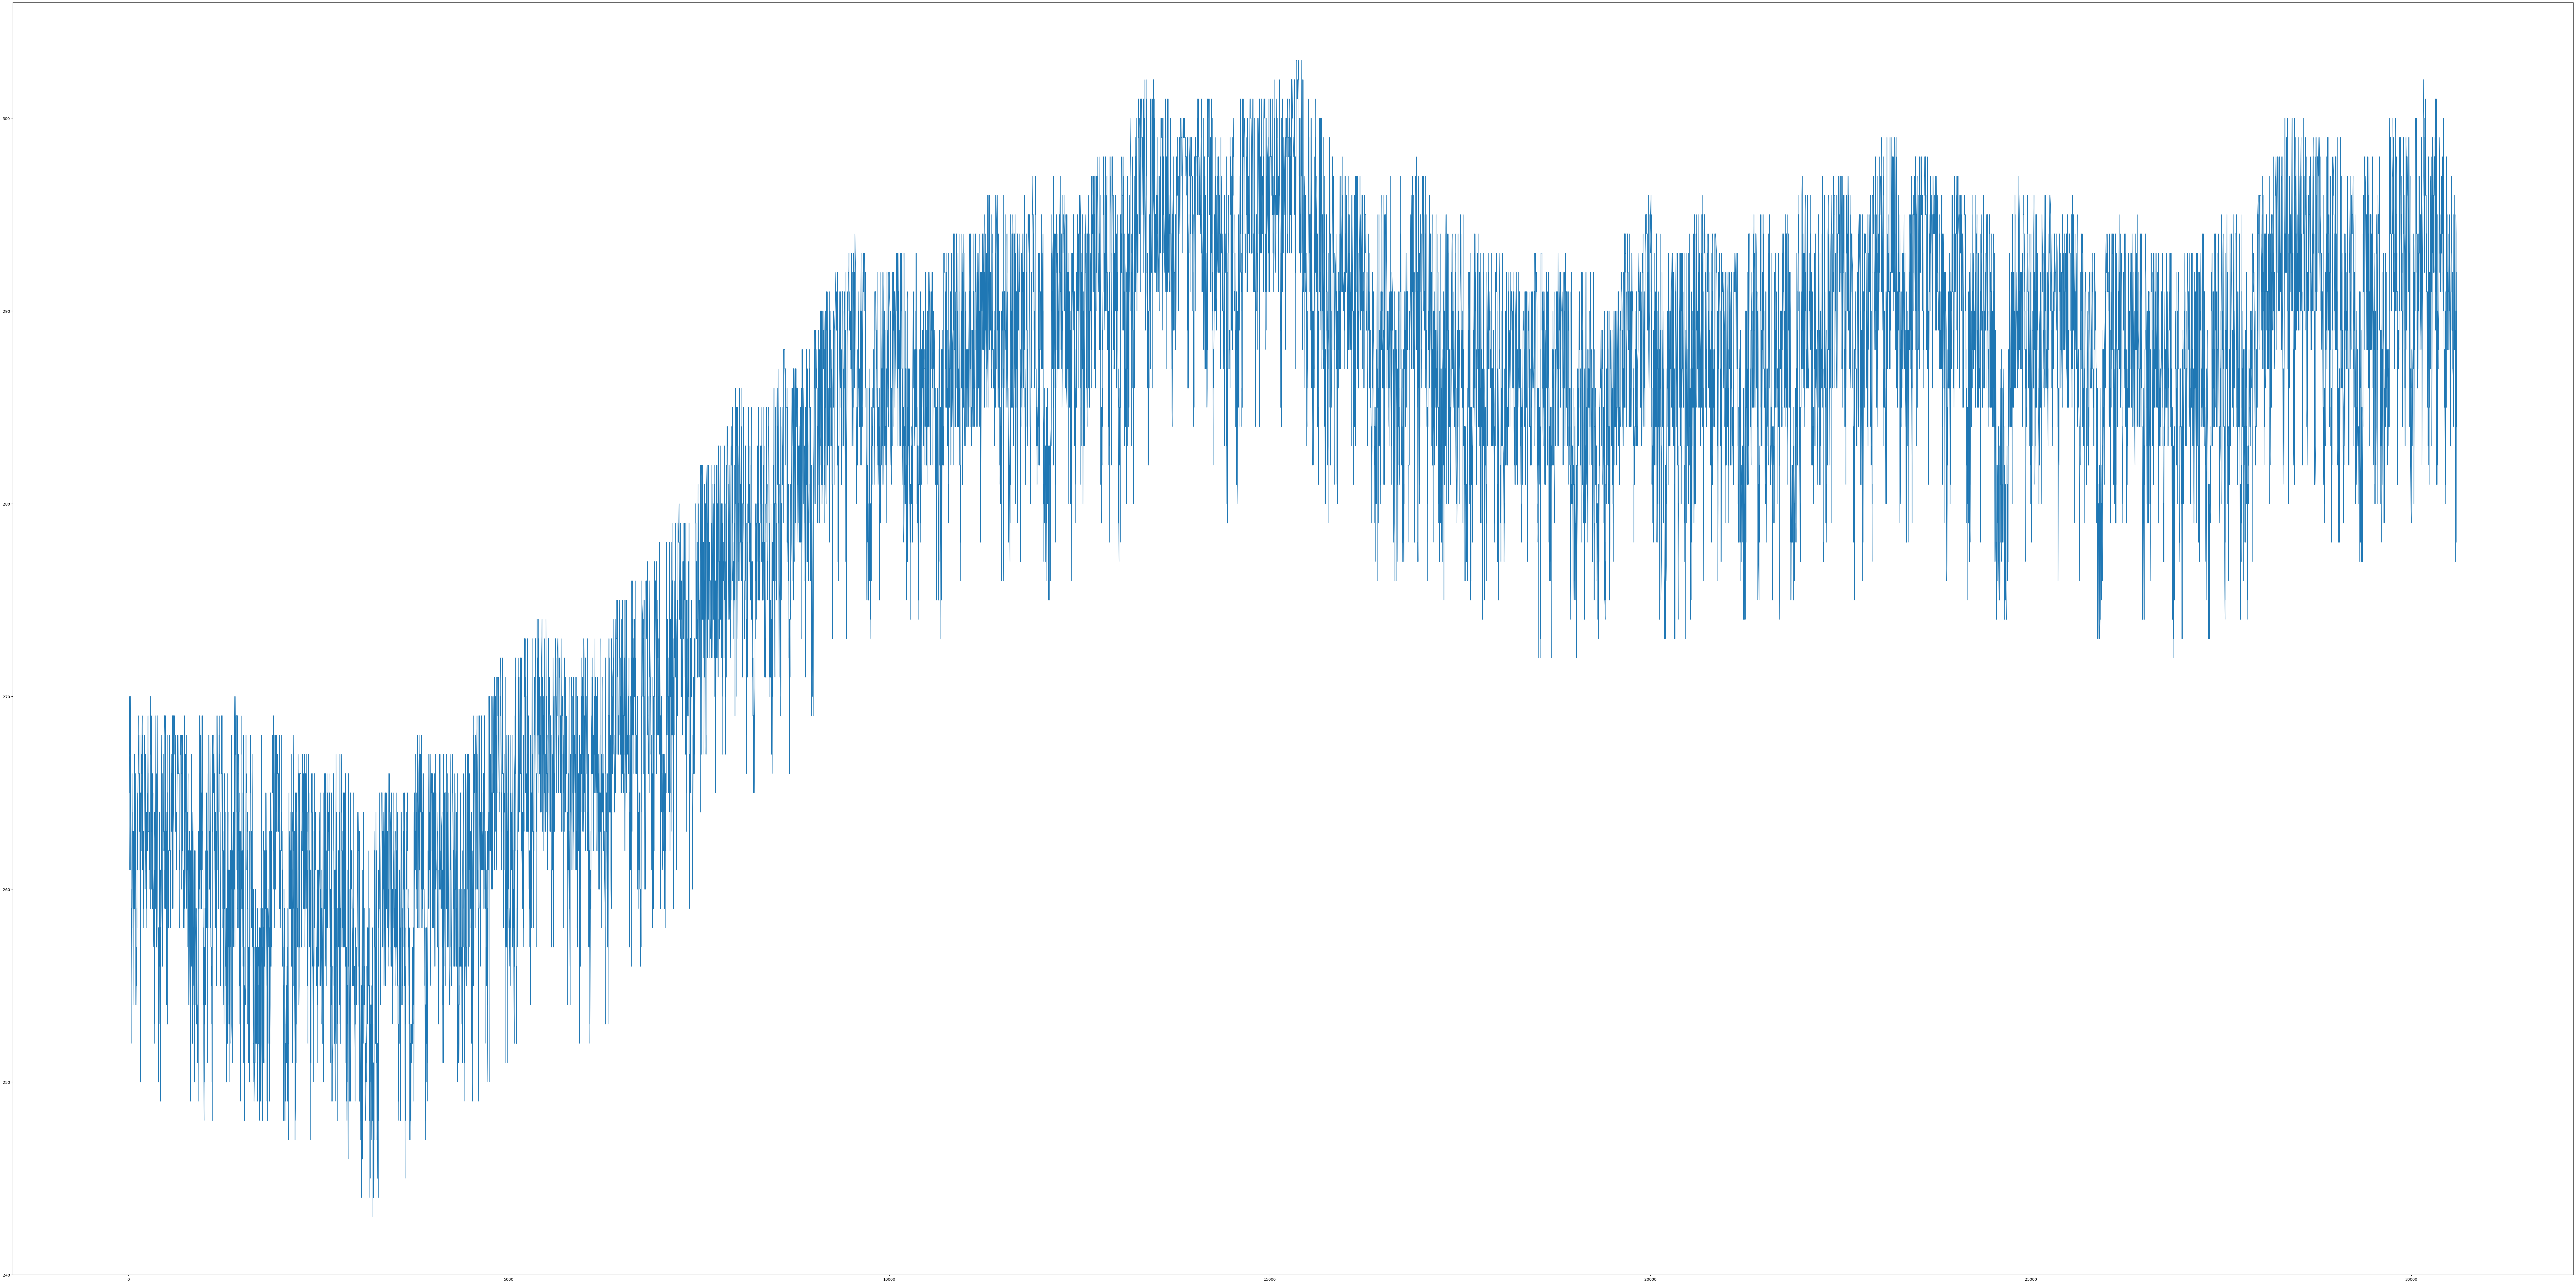

In [15]:
fig, ax = plt.subplots()
ax.figure.set_size_inches(120, 60)
ax.plot(x, y)

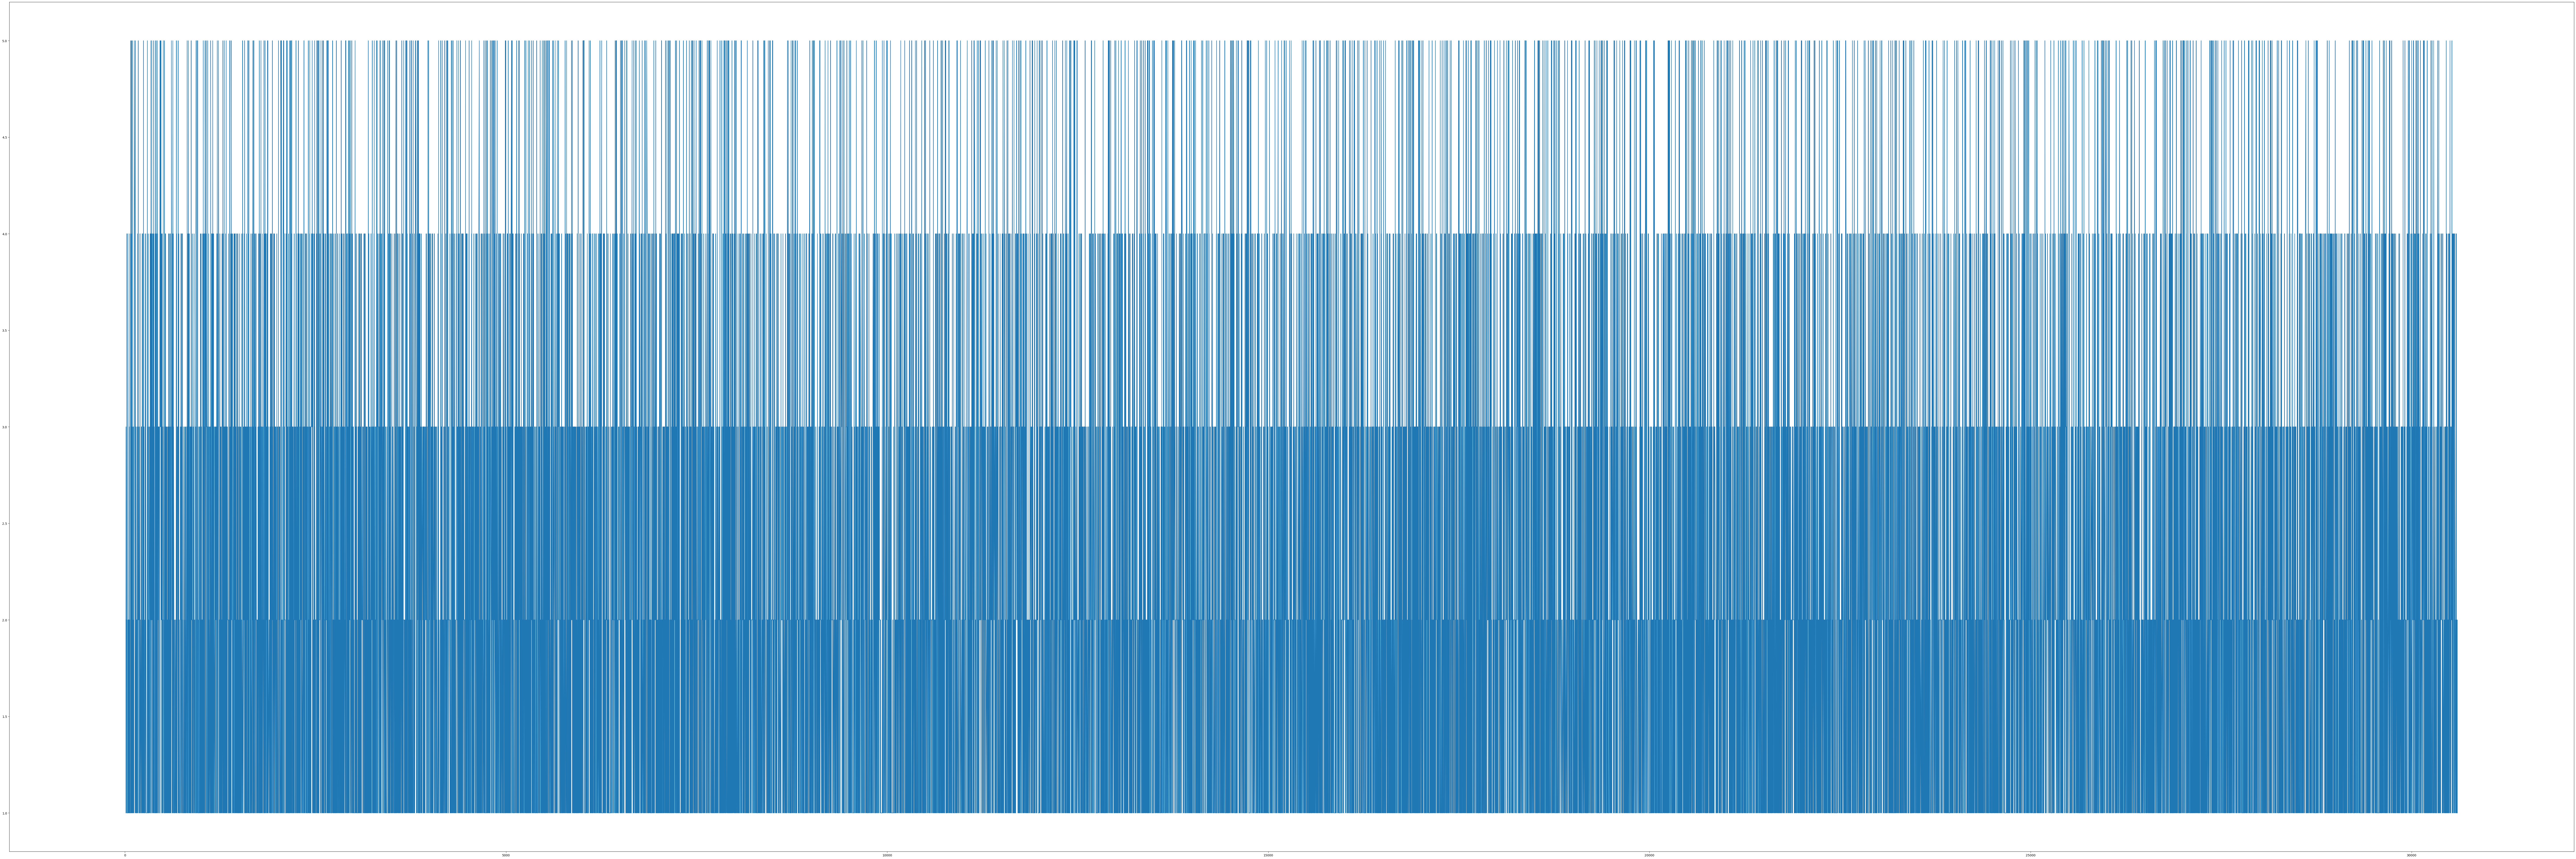

In [20]:
plt.figure(figsize=(150, 50))
plt.plot(x, z)

shape is (26009,)
min price is 270.0
max price is 317.0


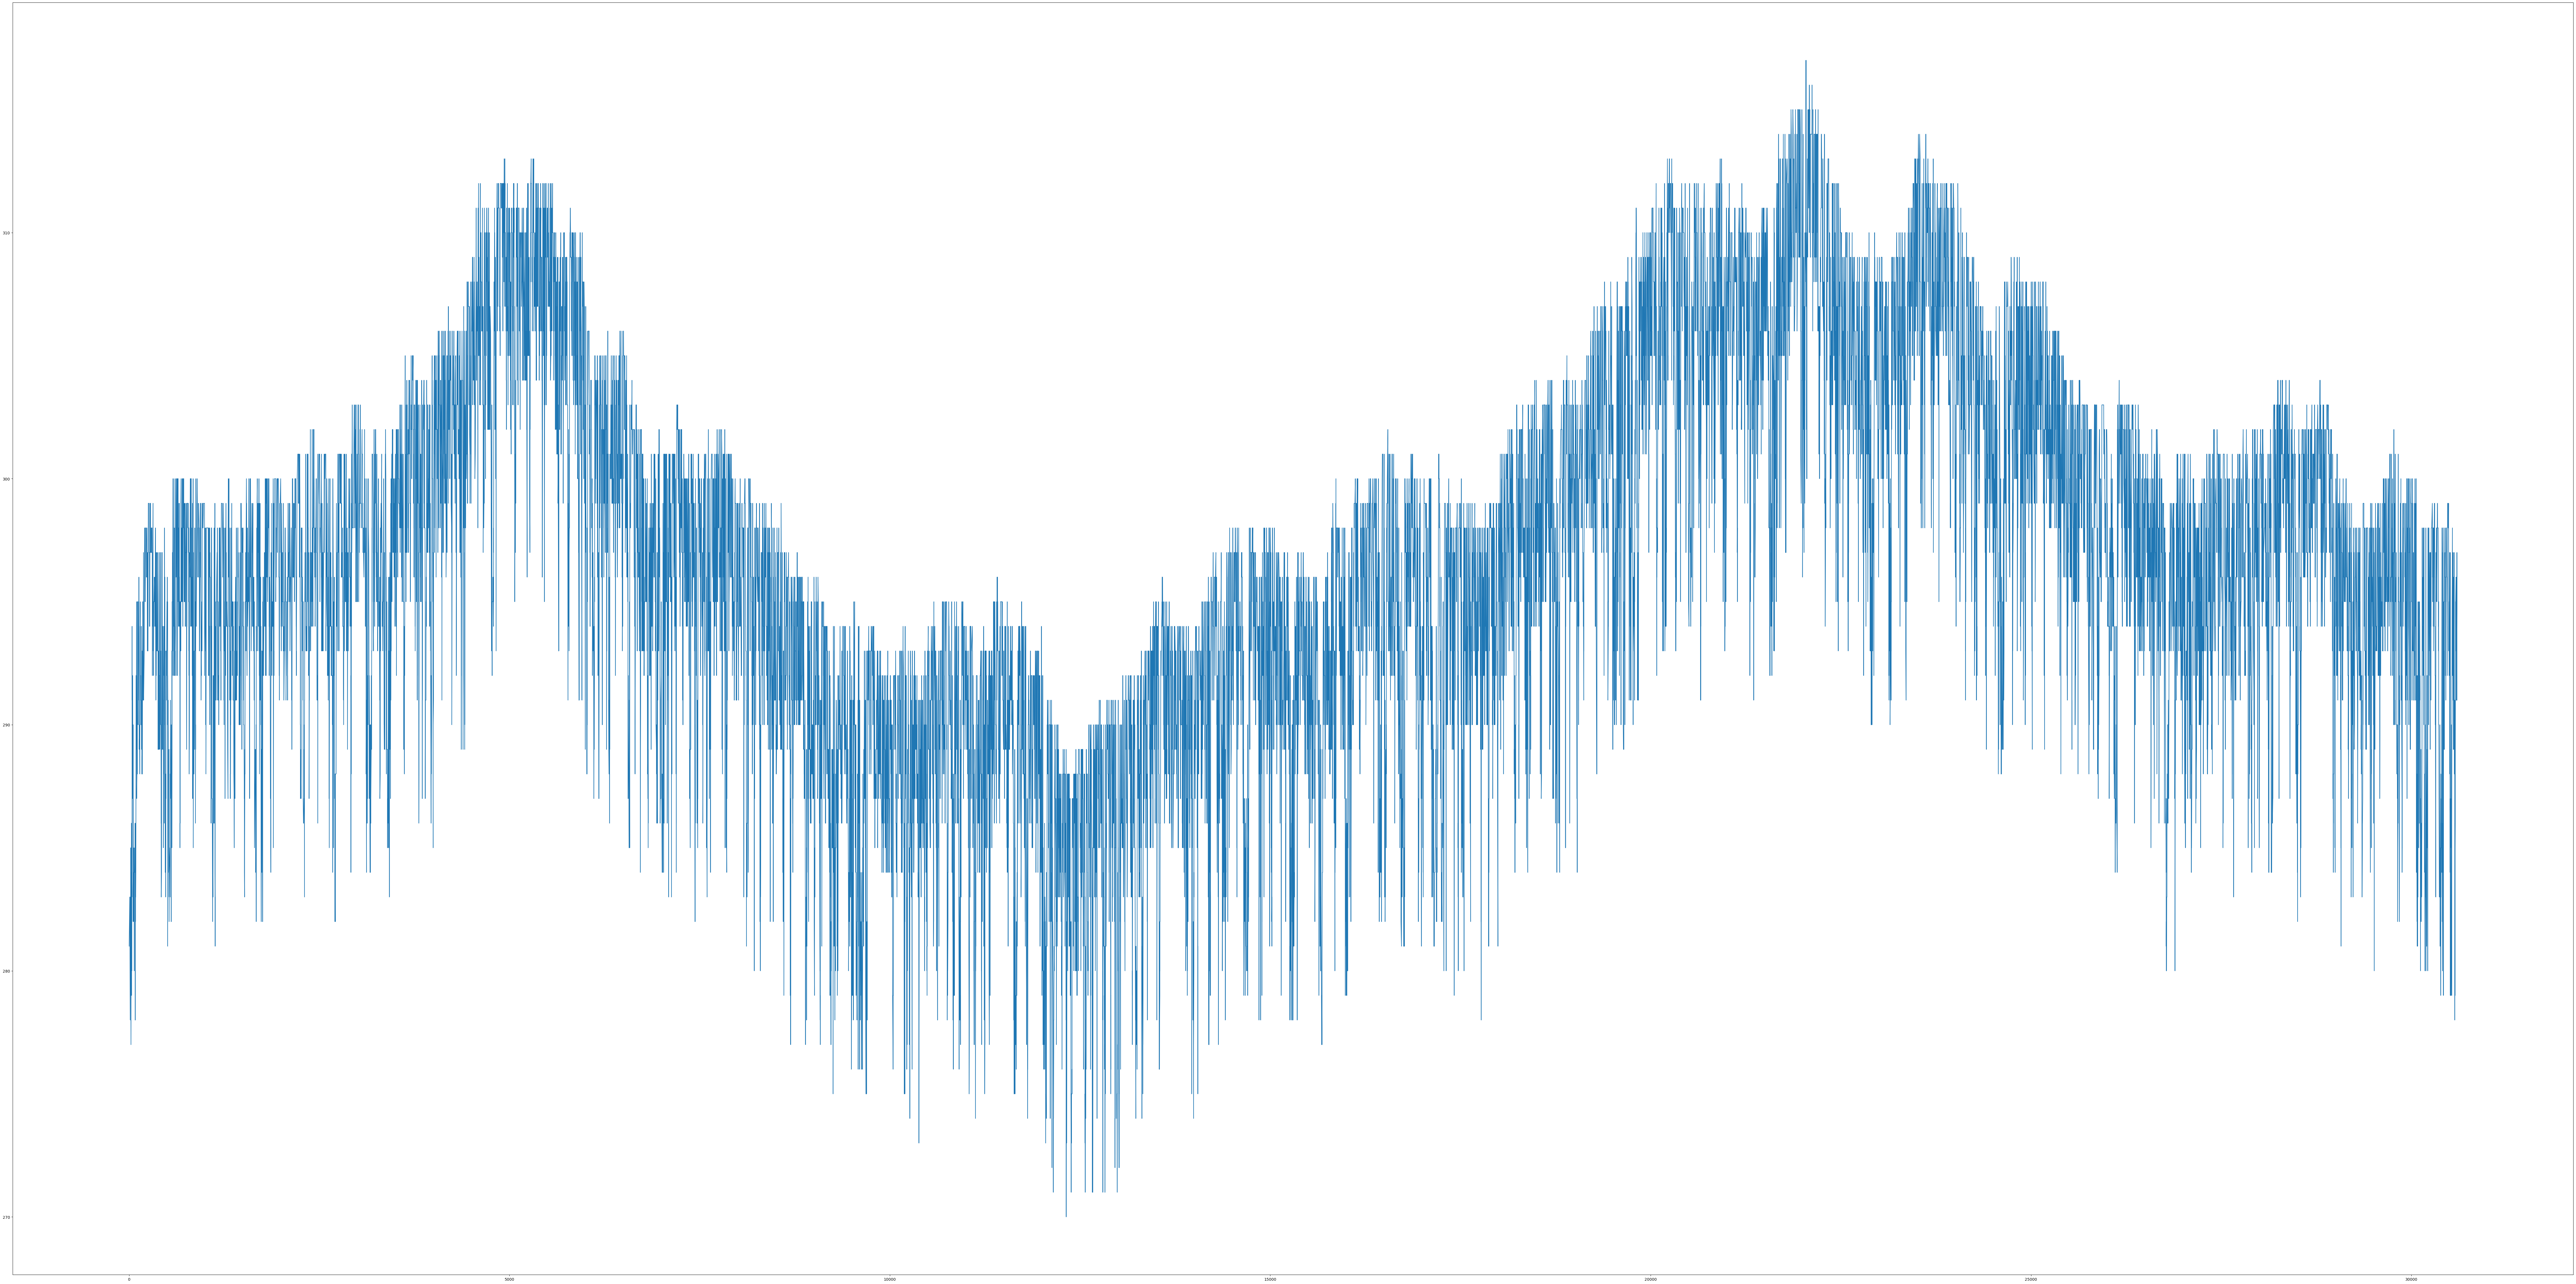

In [17]:
tape = np.loadtxt('Tapes/UoB_Set01_2025-01-03tapes.csv', delimiter=',', dtype=str)
x = tape[:,0].astype(float)
y = tape[:,1].astype(float)
print("shape is {}".format(y.shape))
print("min price is {}".format(np.min(y)))
print("max price is {}".format(np.max(y)))

fig, ax = plt.subplots()
ax.figure.set_size_inches(120, 60)
ax.plot(x, y)

In [127]:
import json
import pandas as pd
import warnings

def parse_lob(data_str):
    timestamps = []
    bids = []
    asks = []

    for i in range(len(data_str)):
        data_str_line = data_str[i].replace('Exch0', '"Exch0"')
        data_str_line = data_str_line.replace("'bid'", '"bid"')
        data_str_line = data_str_line.replace("'ask'", '"ask"')

        data_list = json.loads(data_str_line)

        # Extract exchange rate and exchange name
        exchange_rate = data_list[0]

        # Extract bid and ask data
        bid_data = data_list[2][0][1]
        ask_data = data_list[2][1][1]

        timestamps.append(exchange_rate)
        bids.append([bid_data])
        asks.append([ask_data])

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)

        # Create DataFrames once after the loop
        df = pd.DataFrame({
            'Timestamp': timestamps,
            'Bid': bids,
            'Ask': asks
        })

    # Concatenate nested lists within DataFrame columns
    df['Bid'] = df['Bid'].apply(lambda x: x[0])
    df['Ask'] = df['Ask'].apply(lambda x: x[0])

    return df

# Specify the path to your text file
file_path = 'LOBs/UoB_Set01_2025-01-02LOBs.txt'

# Example usage:
with open(file_path, 'r') as file:
    data_str = file.readlines()

result_df = parse_lob(data_str)
result_df[:20].to_csv('result.csv')
print(result_df[:20])


    Timestamp                   Bid  \
0       0.000                    []   
1       0.279              [[1, 6]]   
2       1.333              [[1, 6]]   
3       1.581              [[1, 6]]   
4       1.643              [[1, 6]]   
5       1.736    [[261, 1], [1, 6]]   
6       1.984    [[261, 1], [1, 6]]   
7       2.015    [[261, 1], [1, 6]]   
8       2.139    [[261, 1], [1, 6]]   
9       2.697  [[262, 6], [261, 1]]   
10      3.069  [[262, 6], [261, 1]]   
11      3.131  [[262, 6], [261, 1]]   
12      3.255  [[262, 6], [261, 1]]   
13      3.286  [[262, 6], [261, 1]]   
14      3.441  [[263, 6], [261, 1]]   
15      3.782  [[263, 6], [261, 1]]   
16      3.813  [[264, 6], [261, 1]]   
17      3.906  [[264, 6], [261, 1]]   
18      4.216  [[264, 6], [261, 1]]   
19      4.340  [[264, 6], [261, 1]]   

                                                  Ask  
0                                                  []  
1                                                  []  
2           

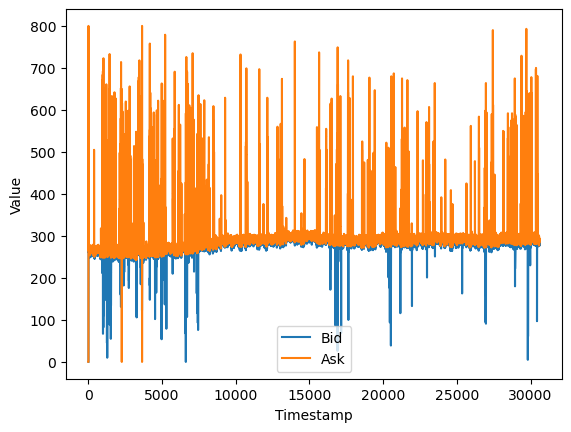

In [135]:
# Extracting values for plotting
timestamps = result_df['Timestamp']
bid_values = [bid[0][0] if bid else 0 for bid in result_df['Bid']]
ask_values = [ask[0][0] if ask else 0 for ask in result_df['Ask']]

# Plotting
plt.plot(timestamps, bid_values, label='Bid')
plt.plot(timestamps, ask_values, label='Ask')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.show()

In [114]:
# this cell is an example parsing of one entry
input_string = '[3.069, "Exch0", [["bid", [[262, 6], [261, 1]]], ["ask", [[296, 1], [297, 5], [338, 3], [797, 1]]]]]'
input_string2 = '[30599.945, "Exch0", [["bid", [[288, 1], [281, 4], [278, 1], [270, 4], [269, 1], [218, 1], [56, 5], [27, 4], [19, 2]]], ["ask", [[294, 1], [397, 5], [401, 5], [714, 3]]]]]'

# Load data using json.loads
data_list = json.loads(input_string2)

# Extract exchange rate and exchange name
exchange_rate = data_list[0]
exchange_name = data_list[1]

# Extract bid and ask data
bid_data = data_list[2][0][1]
ask_data = data_list[2][1][1]

# Create DataFrames
timestamp_df = pd.DataFrame([exchange_rate], columns=['Timestamp'])
bid_df = pd.DataFrame([[bid_data]], columns=['Bid'])
ask_df = pd.DataFrame([[ask_data]], columns=['Ask'])

# Concatenate DataFrames horizontally
result_df = pd.concat([timestamp_df, bid_df, ask_df], axis=1)

# Display the final DataFrame
print(result_df)
result_df.to_csv('result.csv')

   Timestamp                                                Bid  \
0  30599.945  [[288, 1], [281, 4], [278, 1], [270, 4], [269,...   

                                        Ask  
0  [[294, 1], [397, 5], [401, 5], [714, 3]]  


In [124]:
import json
import pandas as pd
import warnings

def parse_lob(data_str):
    timestamps = []
    bids = []
    asks = []

    for i in range(len(data_str)):
        data_str_line = data_str[i].replace('Exch0', '"Exch0"')
        data_str_line = data_str_line.replace("'bid'", '"bid"')
        data_str_line = data_str_line.replace("'ask'", '"ask"')

        data_list = json.loads(data_str_line)

        # Extract exchange rate and exchange name
        exchange_rate = data_list[0]

        # Extract bid and ask data
        bid_data = data_list[2][0][1]
        ask_data = data_list[2][1][1]

        timestamps.append(exchange_rate)
        bids.append([bid_data])
        asks.append([ask_data])

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)

        # Create DataFrames once after the loop
        df = pd.DataFrame({
            'Timestamp': timestamps,
            'Bid': bids,
            'Ask': asks
        })

    # Concatenate nested lists within DataFrame columns
    df['Bid'] = df['Bid'].apply(lambda x: x[0])
    df['Ask'] = df['Ask'].apply(lambda x: x[0])

    return df

# Specify the path to your text file
file_path = 'test.txt'

# Example usage:
with open(file_path, 'r') as file:
    data_str = file.readlines()

result_df = parse_lob(data_str)
result_df[:20].to_csv('result.csv')
print(result_df[:20])


    Timestamp        Bid                             Ask
0       0.000         []                              []
1       0.682  [[50, 3]]                              []
2       2.139  [[58, 3]]                              []
3       2.294  [[58, 3]]                      [[497, 1]]
4       3.751  [[50, 3]]                      [[497, 1]]
5       4.402  [[50, 3]]                      [[740, 1]]
6       5.177  [[50, 3]]                      [[739, 1]]
7       5.673  [[53, 3]]                      [[739, 1]]
8       6.076  [[79, 3]]                      [[739, 1]]
9       6.138  [[14, 3]]                      [[739, 1]]
10      6.231  [[14, 3]]                      [[753, 1]]
11      6.324  [[14, 3]]            [[683, 4], [753, 1]]
12      6.386  [[14, 3]]            [[659, 4], [753, 1]]
13      6.448  [[14, 3]]            [[451, 4], [753, 1]]
14      6.727  [[14, 3]]            [[451, 4], [632, 1]]
15      7.688  [[14, 3]]            [[526, 4], [632, 1]]
16      7.719  [[64, 3]]       